# Road Names in Helsinki
This colours the streets of Helsinki based on the ending of the street name. My eventual goal is to make a coloured map based on if streets named after people are named after a Finnish speaking person, a Swedish speaking person, or a Russian speaking person – but that will be hard so here's my starting point.

This work was inspired by [Giuseppe Sollazzo](https://twitter.com/puntofisso/status/1213135545121099777), who in turn was inspired by previous work by Erin Davis and Cedric Scherer.

## References
* [The beautiful hidden logic of cities](https://erdavis.com/2019/07/27/the-beautiful-hidden-logic-of-cities/)
* [#Berlin road network by name/suffix forming colorful networks](https://twitter.com/CedScherer/status/1195420409434382336)
* [Erin's code](https://github.com/erdavis1/RoadColors)
* [Cedric's code](https://github.com/Z3tt/30DayMapChallenge)
* [Giuseppe's code](https://github.com/puntofisso/OSMnxNotebooks/blob/master/Street%20colouring.ipynb)



In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
%matplotlib inline
ox.config(log_console=True, use_cache=True)

## what happens
Searches for Helsinki in open street maps, had to play around with how Giuseppe did it because for some reason Helsinki doesn't return a "polygon" in OSM

In [2]:
places = ['Helsinki','Espoo','Vantaa'] #Greater helsinki is actually 3 cities
graphs = [ox.graph_from_place(place, network_type='all') for place in places]
combined_graph = nx.MultiGraph()
for g in graphs:
    combined_graph = nx.compose(combined_graph,g)

In [3]:
# This function takes the road name and a 3-letter code for the language and it returns the colour
def colourcode(x):
    if ('katu' in x): 
        return '#C6046E'    # Pink         
    elif ('tie' in x):
        return '#F59305'    # Orange           
        
        # Motorways
    elif ('väylä' in x):     
        return '#0058aa'     #
    elif ('kehä' in x):      # Blue   
        return '#0058aa'     #
        
        # Where the streets have no name
    elif x == 'nan':
        return '#D3D3D3'     #grey
    
        # Everything else with a name
    else:
        return '#197A00'     #Dark Green
        
# For the colouring, we take the attributes from each edge found extract the road name, and use the function above to create the colour array
edge_attributes = ox.graph_to_gdfs(combined_graph, nodes=False)
ec = [colourcode(str(row['name']).lower()) for index, row in edge_attributes.iterrows()]

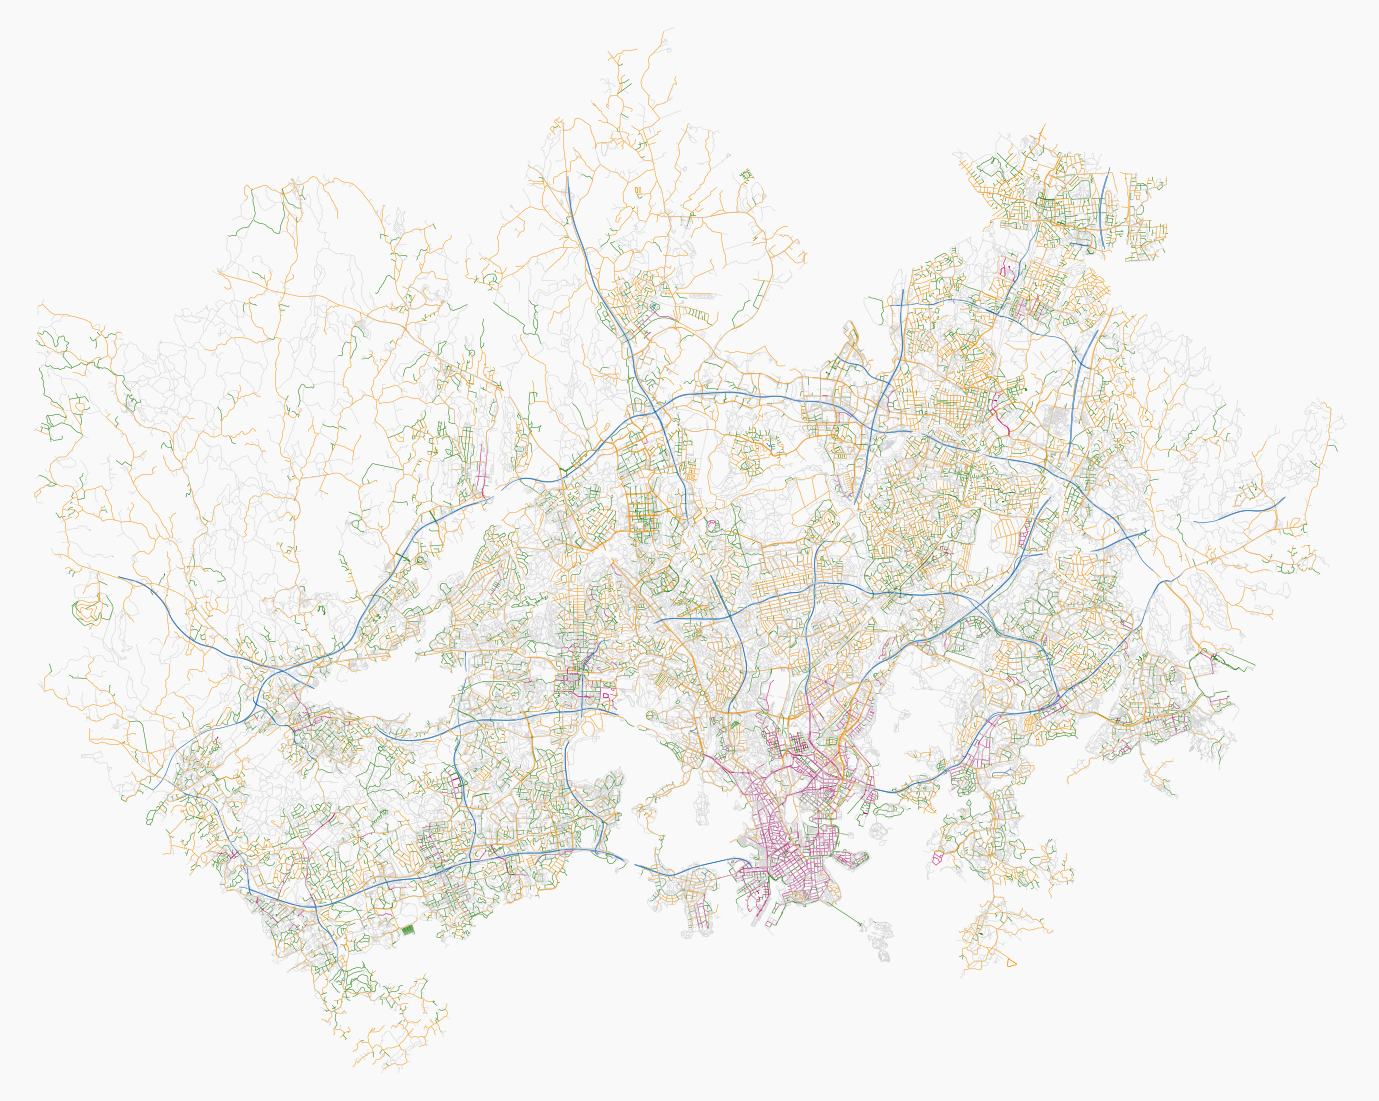

(<Figure size 3643.92x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x129f10310>)

In [4]:
# We can finally draw the plot
fig, ax = ox.plot_graph(combined_graph, bgcolor='#f9f9f9', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=0.5, edge_alpha=1, fig_height=20, dpi=300)

ox.save_and_show(fig,ax,True,True,False,'Greater_Helsinki_all','png',300,True)